We first begin with importing libraries and download csv file that contains the data

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import INSURANCE_DATA_URL
# import data
insurance = pd.read_csv(INSURANCE_DATA_URL)

We first begin with looking into data and look out if the the data is clean nad formatted right.

In [3]:
# Display the first few rows of the dataset
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#check for coluumns types
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


All the columns look good and are formatted correctly. We can see that age, bmi, children, charges are numbers whereas sex, smoker, and region are possibly categories. 

In [5]:
# Display summary statistics for the numerical columns in the insurance dataset
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can see that the mean values for age, BMI, and children are reasonable. The minimum age is 18 and the maximum is 64, which indicates the age range allowed by the company for insurance. The BMI values also look reasonable, with a minimum of 16 and a maximum of 53, which covers the typical range from underweight to severely obese. The average number of children is about 1.1, which is typical for western countries. The lowest insurance charge is 1122, likely for a customer who rarely visits the doctor, while the highest charge is 63770.

In [6]:
#check for duplicat values
insurance.drop_duplicates(inplace=True)


In [7]:
insurance.shape

(1337, 7)

Exploratory Analysis and Visualization

In this section, we will explore the dataset by visualizing the distribution of values in key columns. We will also examine the relationships between "charges" and other variables to gain insights into the factors that may influence insurance costs.

for the visualization we use Matplotlib.plotly, Seaborn and plotly

In [8]:
# import libraries
import plotly.express as px
import matplotlib as mat


Let's improve the default style and font sizes for our charts

In [9]:
# make the plots look better
sns.set_style('darkgrid')
mat.rcParams['font.size'] = 14
mat.rcParams['figure.figsize'] = (10, 6)
mat.rcParams['figure.facecolor'] = '#000000'



#### Age 

Age is quantitive  column. The minumium age in the dataset is 18 and the maximium is 64. Whe can create for each year a bin using histgram so that we can see the distrubition visually. Also we are going to add a box plot.


In [10]:
# See the summary statistics of the 'age' column in the insurance dataset
insurance.age.describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [11]:
# Create a histogram to visualize the distribution of age in the insurance dataset as well as a box plot to show the distribution of age
fig = px.histogram(insurance, x='age', nbins = 47, 
                  title = 'Age Distribution of health Insurance Customers', 
                  marginal = 'box'
                 )
fig.update_layout(bargap = 0.1)
fig.show()

lets find out why there is a lot of 18 - 19 year customers compare to other ages.
first lets look could this caused by some offers that they are getting.
i want to create I scatter plot between age and charge to see do they have less charges to pay.

In [12]:
# Create a scatter plot to visualize the relationship between age and charges with a trendline, colored by smoker status
age_vs_charges_scatter = px.scatter(
    insurance,
    x='age',
    y='charges',
    title='Age vs Charges',
    trendline='ols',
    trendline_color_override='red',
    color='smoker'
)
age_vs_charges_scatter.update_traces(marker=dict(size=10, opacity=0.5, line=dict(width=1, color='DarkSlateGrey')))
age_vs_charges_scatter.update_layout(title_font=dict(size=20), xaxis_title_font=dict(size=16), yaxis_title_font=dict(size=16))
age_vs_charges_scatter.update_xaxes(title_text='Age', title_font=dict(size=16))
age_vs_charges_scatter.update_yaxes(title_text='Charges', title_font=dict(size=16))
age_vs_charges_scatter.update_layout(template='plotly_dark')

age_vs_charges_scatter.show()

We can make the following observations from the above chart:

- Medical charges generally increase with age, as expected. However, there is significant variation at every age, so age alone does not determine medical charges.
- There appear to be three main clusters of data points:
    - The largest cluster consists mainly of non-smokers with relatively low medical charges.
    - The second cluster includes both smokers and non-smokers. This may represent non-smokers with health issues and smokers without major health issues.
    - The third cluster consists exclusively of smokers with very high medical charges, likely due to smoking-related health problems.

Overall, while age is a factor, smoking status has a strong impact on medical charges, and there are other factors influencing the variation as well.


#### Body Mass Index
Let's look the BMI of customers using histogram


In [13]:
fig = px.histogram(
    insurance,
    x='bmi',
    marginal='box',
    color_discrete_sequence = ['purple'],
    title='Distribution of BMI'
)
fig.update_layout(bargap=0.1)
fig.show()

We can see that the interquartile range for BMI is approximately 26–34. The distribution is roughly normal and centered around 30. Most customers fall into the overweight or obese categories. There are a non outliers on the lower end, but few on the higher end.

#### Charges 

Let's visualize the distrubution of the annual medical charges for customers. This is the column we're trying to predict so for better visualizations we add categorical column 'smoker'.

In [14]:
fig = px.histogram(insurance, x = 'charges', 
              marginal = 'box',
              title = 'Distribution of charges'
              )
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig = px.histogram(
    insurance,
    x = 'charges',
    marginal = 'box',
    color = 'smoker',
    color_discrete_sequence= ['red', 'green'],
    title = 'Distribution of Charges by Smoking Status'
)
fig.update_layout(bargap = 0.1)
fig.show()

There is a significant difference in insurance charges between smokers and non-smokers. Most customers pay between $2,000 and $12,000, but smokers are much more likely to have higher charges, often forming two distinct groups: one with moderate charges and another with very high charges. This may indicate that the amount someone smokes also affects their costs. The distribution of charges is heavily skewed like "power law graph", with a small number of customers paying much higher amounts. This clearly shows that smoking greatly increases insurance costs.

## Let's examine how gender affects insurance charges. 



In [16]:
fig = px.histogram(
    insurance,
    x = 'charges',
    marginal = 'box',
    color = 'sex',
    color_discrete_sequence = ['pink', 'blue'],
    title  = 'Distribution of charges by gender'
)
fig.update_layout(bargap = 0.1)
fig.show()

Both males and females pay similar insurance charges, with the median around $9,000 for both groups. However, males show greater variability in charges, and there are more males among those with the highest charges. This may be due to lifestyle differences or riskier behaviors that can lead to higher medical costs for men. Overall, gender does not appear to have a major impact on the typical insurance charge, but it may influence the likelihood of incurring very high charges.

## Let's examine how region affects insurance charges. 

In [17]:


fig = px.histogram(
     insurance,
     x = 'charges',
     marginal = 'box',
     color = 'region',
    title  = 'Distribution of charges by gender'
)
fig.update_layout(bargap = 0.1)
fig.show()

The Southwest region has the least variation in charges and the lowest median charge, around $8,800. The Southeast shows the greatest variation, with many people paying both very low and very high amounts; its mean charge is about $9,200. Overall, the region where a customer lives does not strongly correlate with insurance charges.

## smoker
Let's visualize the distribution of the smoker (gender included) column using a histogram.

In [18]:
insurance.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [19]:
fig = px.histogram( insurance, 
                   x = 'smoker',
                   color = 'sex',
                  title = 'Distribution of smoker status')
fig.update_layout(bargap = 0.1)
fig.show()

## Sex

Let's look the distribution of gender

In [20]:
insurance.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [21]:
fig = px.histogram(
    insurance,
    x = 'sex',
    color = 'sex',
    title= 'Distribution of region'
)

fig.update_layout(bargap = 0.1)
fig.show()

## region

Let's look the distribution of region

In [22]:
insurance.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [23]:
fig = px.histogram(
    insurance,
    x = 'region',
    color = 'region',
    title= 'Distribution of region'
)

fig.update_layout(bargap = 0.1)
fig.show()

## Children
Let's look the distribution of children

In [24]:
fig = px.histogram(
    insurance,
    x = 'children',
    color = 'children',
    title = 'Distribution of Children'
)

fig.update_layout(bargap = 0.1)
fig.show()

The data visualization indicates that having no children or only one child is the most common scenario within this population. The likelihood of having more than two children drops significantly, highlighting a strong skew towards smaller family sizes or childlessness.

### BMI and Charge

we going to visualize does BMI correlate to charge using scatter plot

In [25]:
fig = px.scatter(insurance,
                 x = 'bmi',
                 y = 'charges',
                 color = 'smoker',
                 title = 'BMI vs Charges by Smoking Status',
                 opacity= 0.7,
                 hover_data= ['sex'],
                 trendline = 'ols')
fig.update_traces(marker_size = 5)
fig.show()

The data shows that for smokers, there is a clear difference in charges between obese and non-obese individuals—obese smokers tend to pay much higher charges. However, for non-smokers, BMI does not have a significant impact on charges; both obese and non-obese non-smokers have small difference in  insurance costs.

## children and charges
Let's investigate whether there is a correlation between the number of children a customer has and their insurance costs. We'll visualize the relationship to see if having more children leads to higher insurance charges.

In [26]:
fig = px.violin(insurance,
                x = 'children',
                y = 'charges',
                title = 'Charges by Number of Children',
                color = 'children')
fig.show()

The number of children does not show a clear or strong effect on insurance charges, but slight increase can be observed.

## Sex and Charges 
Let's investigate whether there is a correlation between customer gender and their insurance costs. We'll visualize the relationship to see if certain gender leads to higher insurance charges.

In [27]:
fig = px.violin(
    insurance,
    x='sex',
    y='charges',
    title='Charges by gender',
    color = 'sex'
)
fig.show()

The gender does not show a clear or strong effect on insurance charges. 

### Region and Charges 

Let's investigate whether there is a correlation between region and their insurance costs. We'll visualize the relationship to see if certain region leads to higher insurance charges.

In [28]:
fig = px.violin(insurance,
                x = 'region',
                y = 'charges',
                title = 'Charges by gender',
                color = 'region')
fig.show()

# Correlation

Correlation between numerical variables can be quantified using a correlation coefficient, which measures the strength and direction of the linear relationship between two variables. A correlation value close to 1 indicates a strong positive relationship, while a value close to -1 indicates a strong negative relationship. A value near 0 suggests little or no linear correlation. Calculating correlations helps us understand how changes in one variable may be associated with changes in another, which is useful for identifying important predictors and relationships in the data.

In [29]:
smoker = {"no": 0, "yes":1}
insurance['data_smoker'] = insurance.smoker.map(smoker)
insurance.head()

,age,sex,bmi,children,smoker,region,charges,data_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


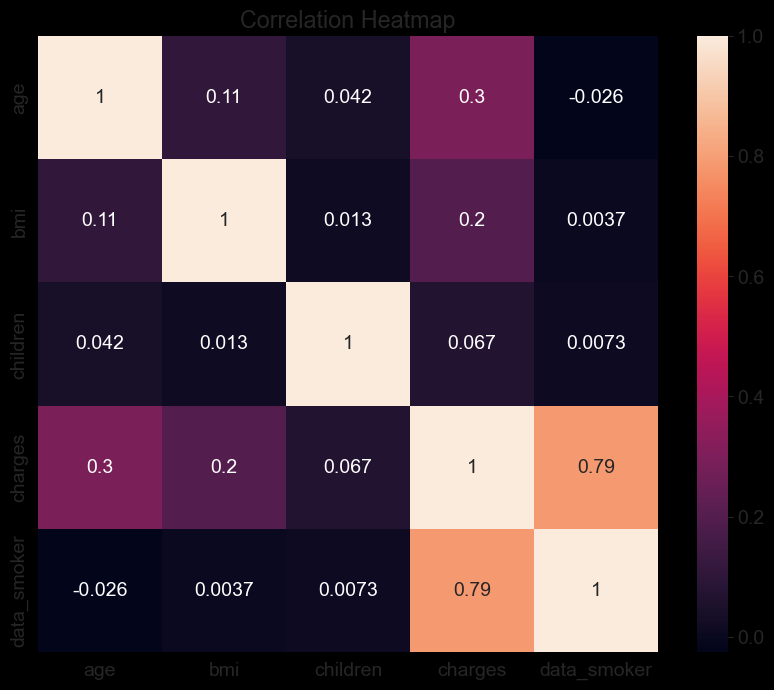

In [30]:

numerical_columns = insurance.select_dtypes(include= [np.number])
numerical_columns.head()
plt.figure(figsize=(10, 8))
sns.heatmap(
    numerical_columns.corr(),
    annot=True,
    linecolor='black'
)
plt.title('Correlation Heatmap')
plt.show()

# Correlation vs causation fallacy:

 A high correlation doesn't mean one thing causes another. Two things X and Y can happen together for different reasons: X might cause Y, or Y might cause X, or something else Z might cause both X and Y. The correlation breaks down when you remove the real cause. Sometimes X and Y just look connected because you didn't look at enough examples.
This might seem obvious, but computers can't tell the difference between things that just happen together and things that actually cause each other. When automated systems make important decisions, this can seriously impact society. That's why humans need to figure out what's really causing what - computers can spot patterns, but they can't understand the "why" behind them.


# Linear Regression using a Single Feature

We found that smoking status and age have the strongest correlation with insurance charges. Now let's see if we can predict charges based on age alone, but only for non-smokers. To do this, we'll first create a separate dataset that includes only the non-smoker data.

In [31]:
non_smoker_df = insurance[insurance['data_smoker'] == 0]
non_smoker_df.head()


,age,sex,bmi,children,smoker,region,charges,data_smoker
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
5,31,female,25.740,0,no,southeast,3756.62160,0


Let's visualize the relationship between "age" and "charges"

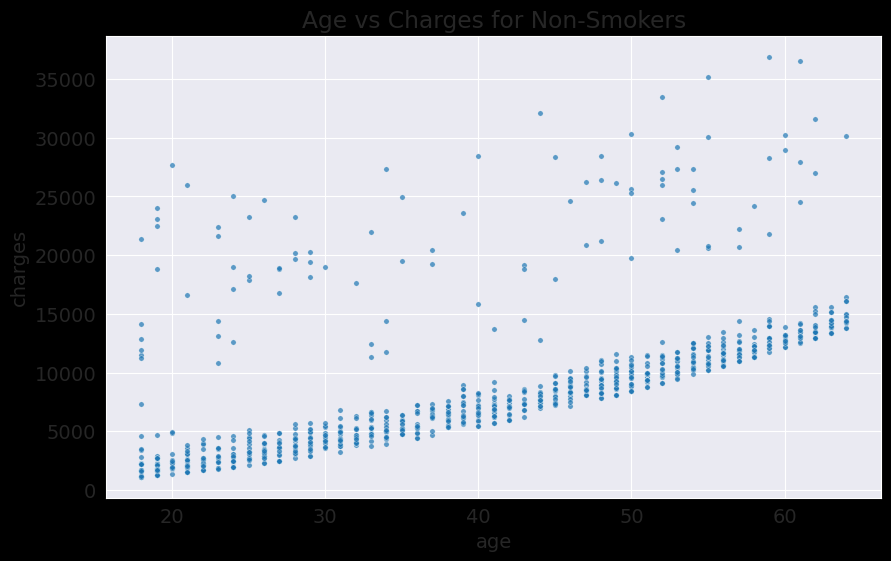

In [32]:
plt.title("Age vs Charges for Non-Smokers")

sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 15)
plt.style.use('default')

It looks like most of the data points are in the lower portion of the scatter plot. They follow a linear pattern, so we can fit a straight line through these points and use it to predict charges based on age.

A line on an X-Y coordinate system follows this formula:
y = wx + b
This line is defined by two key numbers:

w (the slope): determines how steep the line is - how much y increases when x increases by 1
b (the intercept): where the line crosses the y-axis when x = 0

Once we find the best values for w and b using our data, we can predict charges for any given age by plugging the age value into our formula.

# Model
Since age is on the x-axis and charges are on the y-axis, our formula becomes:

Charges = w * Age + b
Our goal is to find the best values for w and b that create a line fitting our data points.

Key terminology:

* Linear regression: This technique of finding the best-fitting straight line through data points. We call our equation a "linear regression model" because it represents the relationship between age and charges as a straight line.

* Parameters (or weights): The values w and b that we're trying to find. These define our specific line.

* Inputs: The age values from our dataset. These are what we feed into our model to make predictions.

* Targets: The actual charges values from our dataset. these are what we're trying to predict.

Once we determine the optimal w and b values, we can predict insurance charges for any age by simply plugging the age into our formula.



In [33]:
def predict_charges(age, w, b):
    """
    Predicts the insurance charges based on age using a linear regression model.
    
    Parameters:
    age (float): The age of the individual.
    w (float): The slope of the regression line.
    b (float): The y-intercept of the regression line.
    
    Returns:
    float: The predicted insurance charges.
    """
    return w * age + b

In [34]:
b = 50
w = 100
predict_charges(20, w, b)
ages = non_smoker_df['age']
non_smoker_df.head()
predicted_charges = predict_charges(ages,w,b)

Let's use line graph

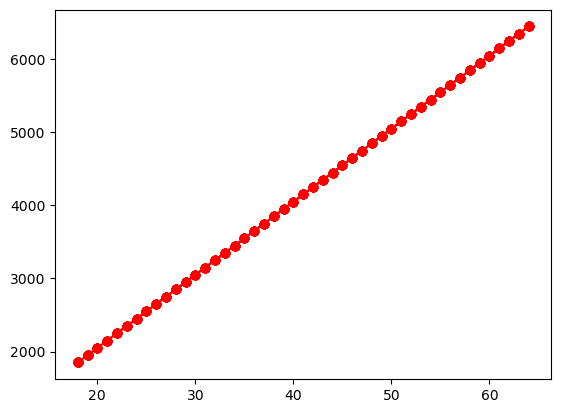

In [35]:
plt.plot(ages, predicted_charges, 'r-o')


Let's overlay our predicted line on top of the actual data points to visually check how well our model fits the data. This will help us see if our linear regression model is a good representation of the relationship between age and charges for non-smokers.

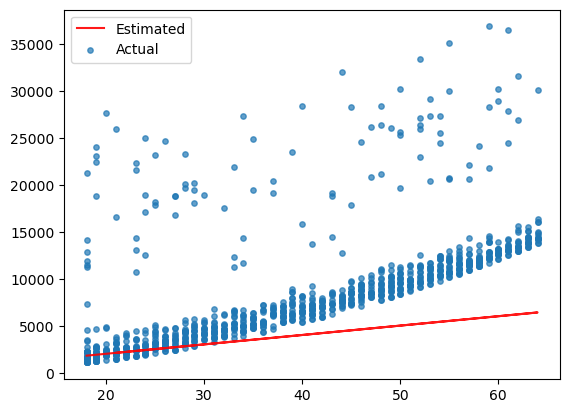

In [36]:
plt.plot(ages, predicted_charges, 'r', alpha = 0.9)
plt.scatter(data = non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 15)
plt.xlabel = 'Age'
plt.ylabel = 'Charges'
plt.legend(['Estimated', 'Actual'])


Our initial guess for the parameters was not accurate. Let's try an intuitive approach by manually adjusting the values of w and b to see if we can get closer to a good fit.

In [37]:
def try_estimate(w,b):
    ages = non_smoker_df['age']
    target = non_smoker_df['charges']
    predicted_charges = predict_charges(ages,w,b)

    plt.plot(ages, predicted_charges, 'r', alpha = 0.9)
    plt.scatter( x = ages, y = target, alpha = 0.7, s= 15)
    plt.xlabel = 'Age'
    plt.ylabel = 'Charges'
    plt.legend(['Estimated', 'Actual'])


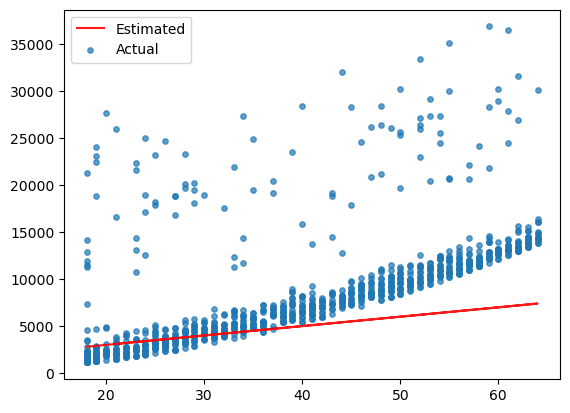

In [38]:
try_estimate(100,1000)

# Loss/Cost functions

Loss (or cost) functions measure how well our model's predictions match the actual data. Two common loss functions are RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error). Both work by calculating the difference between the predicted values and the actual data points, then summarizing these differences into a single number. Lower values indicate a better fit to the data.

In [39]:
def RMSE (predicted, target):
    """
    Calculates the Root Mean Squared Error (RMSE) between predicted and target values.
    
    Parameters:
    predicted (array-like): The predicted values.
    target (array-like): The actual target values.
    
    Returns:
    float: The RMSE value.
    """
    return np.sqrt(np.mean((predicted - target) ** 2))

In [40]:
def MAE(predicted, target):
    """
    Calculates the  Mean Absolute Error (MAE) between predicted and target values.
    
    Parameters:
    predicted (array-like): The predicted values.
    target (array-like): The actual target values.
    
    Returns:
    float: The MAE value.
    """
    return np.mean(np.abs(predicted - target))

In [41]:
MAE(50, 100)

50.0

In [42]:
RMSE(50, 100)


50.0

We can see that RMSE (Root Mean Squared Error) is more sensitive to outliers than MAE (Mean Absolute Error). This is because RMSE squares the errors before averaging, giving more weight to larger errors, while MAE treats all errors equally. As a result, outliers have a greater impact on RMSE, making it higher when extreme values are present.

In [43]:
def try_parameters_non(w,b):
    ages = non_smoker_df['age']
    target = non_smoker_df['charges']
    predicted_charges = predict_charges(ages,w,b)

    plt.plot(ages, predicted_charges, 'r', alpha = 0.9)
    plt.scatter( x = ages, y = target, alpha = 0.7, s= 15)
    plt.xlabel = 'Age'
    plt.ylabel = 'Charges'
    plt.legend(['Estimated', 'Actual'])

    print("MAE: ", MAE(predicted_charges, target))
    print("RMSE: ", RMSE(predicted_charges, target))


MAE:  2843.2573304976486
RMSE:  4754.944649618778


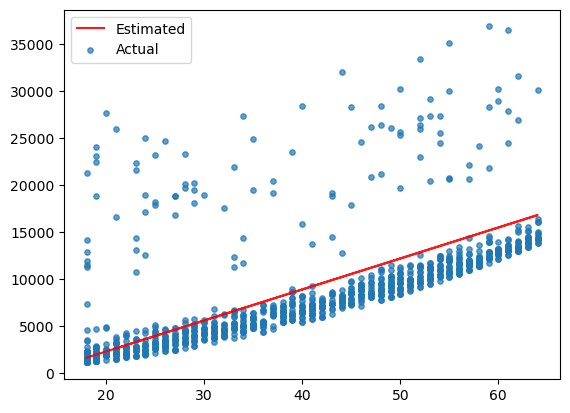

In [44]:
try_parameters_non(330,-4300)

# Optimizer

It is difficult to achieve a very small error by manually adjusting the parameters. To build a more accurate model, let's use a mathematical approach to find the best-fitting line.

Ordinary Least Squares: (better for smaller datasets)
Stochastic gradient descent: (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for w and b using matrix operations, while gradient descent uses a iterative approach, starting with a random values of w and b and slowly improving them using derivatives.


In [45]:
from sklearn.linear_model import LinearRegression

# Ordinary Least Squares

In [46]:
model = LinearRegression()

In [47]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [48]:
inputs = non_smoker_df[['age']]
target = non_smoker_df.charges

In [49]:
non_smoker_df.describe()

,age,bmi,children,charges,data_smoker
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.0
mean,39.404516,30.651853,1.091251,8440.660307,0.0
std,14.076133,6.045956,1.218250,5992.973800,0.0
min,18.000000,15.960000,0.000000,1121.873900,0.0
25%,27.000000,26.315000,0.000000,3988.883500,0.0
50%,40.000000,30.305000,1.000000,7345.726600,0.0
75%,52.000000,34.430000,2.000000,11363.019100,0.0
max,64.000000,53.130000,5.000000,36910.608030,0.0


In [50]:
model.fit(inputs, target)

LinearRegression()

In [51]:
model.predict(np.array([[23],
                        [37], 
                        [61]]))

c:\Users\bashi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4058.71368614,  7798.37016075, 14209.20983152])

In [52]:
predictions = model.predict(inputs)
predictions


array([2723.12208806, 5394.30528422, 6729.89688229, ..., 2723.12208806,
       2723.12208806, 3524.47704691])

In [53]:
print("RMSE: ", RMSE(target, predictions))
print("MAE:  ", MAE(target, predictions))

RMSE:  4664.514914257795
MAE:   2582.634566673575


The RMSE is approximately 4,665, which is the lowest value observed so far. The MAE is 2,582, which is quite good considering that the interquartile range of charges spans from 4,000 to 11,000 difference of about 7,000. This indicates that our model provides reasonably accurate predictions within the typical range of insurance charges.

The parameters of the model are stored in the coef_  _w and intercept_ properties _b .  

In [54]:
print("model_coef: ", model.coef_)
print("model_intercpet: ", model.intercept_)

model_coef:  [267.11831962]
model_intercpet:  -2085.0076650139054


Let's plot to see visually

MAE:  2582.634566802358
RMSE:  4664.514914257796


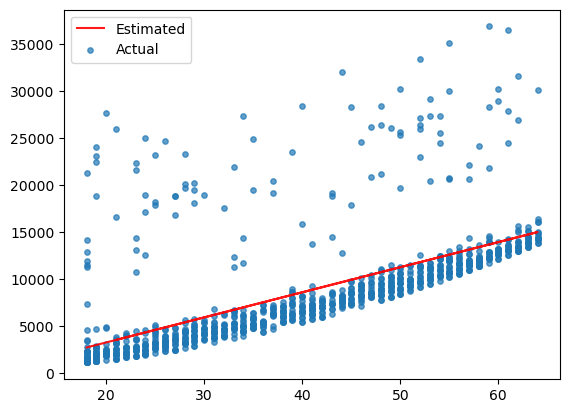

In [55]:
try_parameters_non(267.11831962,-2085.0076650139054)

The regression line appears to be positioned above the most densely populated area of data points. This is primarily due to the influence of outliers—individuals with exceptionally high insurance charges. Which pull the line upward. As a result, the model tends to overestimate charges for the majority of non-smoker customers. This highlights a common limitation of linear regression: it is sensitive to extreme values, which can disproportionately affect the fit and lead to less accurate predictions for the typical cases in the dataset.

# Stochastic gradient descent

In [56]:
from sklearn.linear_model import SGDRegressor

# Prepare the data
X = inputs  # ages as DataFrame
y = target  # charges

# Create and train the SGDRegressor model
sgd_model = SGDRegressor()
sgd_model.fit(X, y)

# Make predictions
sgd_predictions = sgd_model.predict(X)

# Compute the loss
print("SGD RMSE:", RMSE(sgd_predictions, y))
print("SGD MAE: ", MAE(sgd_predictions, y))


print("\n")
# Compare with previous results (OLS)
print("OLS RMSE:", RMSE(predictions, y))
print("OLS MAE: ", MAE(predictions, y))

SGD RMSE: 6060.380301883749
SGD MAE:  3623.4982548081407


OLS RMSE: 4664.514914257795
OLS MAE:  2582.634566673575


Let's see the parameters w and b of the model 

In [57]:
print("w: ", sgd_model.coef_)
print("b: ", sgd_model.intercept_)

w:  [119.59525891]
b:  [462.72040425]


MAE:  3623.4982548081407
RMSE:  6060.380301883749


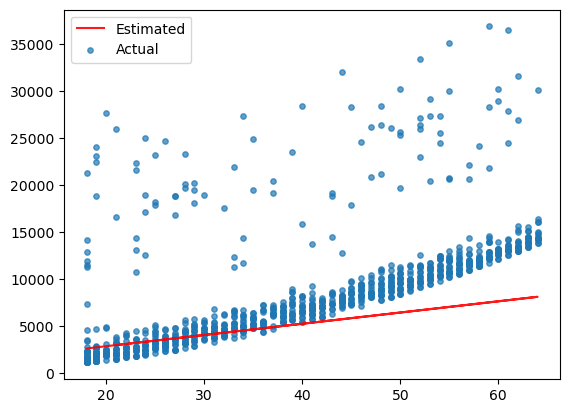

In [58]:
try_parameters_non(sgd_model.coef_, sgd_model.intercept_)

Initially, the SGD regression line was positioned above the most densely populated area of the data. As the optimization progressed, the line gradually shifted downward, eventually falling below the main cluster of data points. This resulted in the model underestimating charges for older ages, where the regression line is below all actual data points. This behavior suggests that the SGD optimizer may not have fully converged or that its parameters require further tuning for better accuracy.

# Smoker Linear regression

In [59]:
# smoker data
smoker_df = insurance[insurance['data_smoker'] == 1]
# charges and age of smokers
smoker_charges = smoker_df['charges']
smoker_ages = smoker_df[['age']]

#model for smokers
smoker_model = LinearRegression()
# Fit the model for smokers
smoker_model.fit(smoker_ages, smoker_charges)

# Make predictions for smokers
smoker_predictions = smoker_model.predict(smoker_ages)

# Compute the Loss for smokers
print("Smoker RMSE:", RMSE(smoker_charges, smoker_predictions))
print("Smoker MAE: ", MAE(smoker_charges, smoker_predictions))
smoker_df.head()

Smoker RMSE: 10711.00334810241
Smoker MAE:  10097.800577858732


,age,sex,bmi,children,smoker,region,charges,data_smoker
0,19,female,27.90,0,yes,southwest,16884.9240,1
11,62,female,26.29,0,yes,southeast,27808.7251,1
14,27,male,42.13,0,yes,southeast,39611.7577,1
19,30,male,35.30,0,yes,southwest,36837.4670,1
23,34,female,31.92,1,yes,northeast,37701.8768,1


Let's see the line on a scatter plot

MAE:  24147.312123503652
RMSE:  26456.707581503717


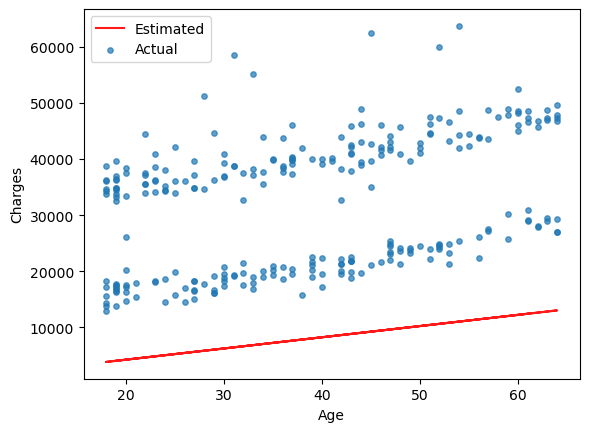

In [60]:


def try_parameters_smoker(w, b):
    ages = smoker_df['age']
    target = smoker_df['charges']
    predicted_charges = predict_charges(ages, w, b)
  

    fig, ax = plt.subplots()
    ax.plot(ages, predicted_charges, 'r', alpha=0.9)
    ax.scatter(x=ages, y=target, alpha=0.7, s=15)
    ax.set_xlabel('Age')
    ax.set_ylabel('Charges')
    ax.legend(['Estimated', 'Actual'])

    print("MAE: ", MAE(predicted_charges, target))
    print("RMSE: ", RMSE(predicted_charges, target))

try_parameters_smoker(200, 200)


MAE:  10097.800577858732
RMSE:  10711.00334810241


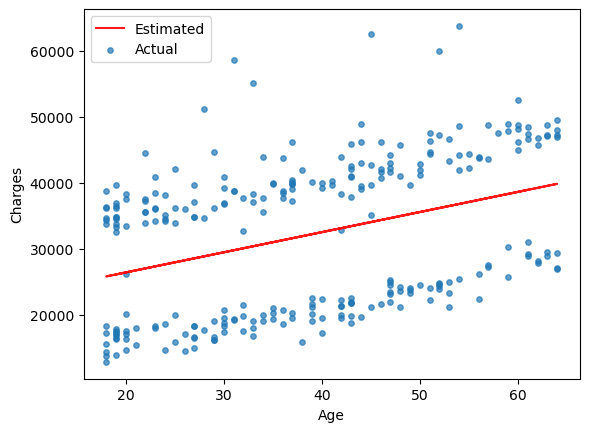

In [61]:

w = smoker_model.coef_[0]
b = smoker_model.intercept_
try_parameters_smoker(w, b)



# Model Accuracy

Both the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are 10,000. This tells us that, on average model predictions are off by about 10,000 units. Considering data values range from 10,000 to 40,000, an error of 10,000 is quite substantial. While the model provides a general sense of the data, its accuracy is limited for precise estimations within this range.

# Bimodal Challenge

When looking at the "smoker" category, we observe a data saturation area that appears as two distinct lines, with the model's estimation line falling directly between them. This suggests that the smoker population likely consists of two separate subgroups rather than a single, homogeneous group. The current single estimation line is essentially averaging these two distinct patterns, which naturally compromises its accuracy for either individual subgroup.

#  Stochastic gradient descent for smokers

MAE:  1522075557.308716
RMSE:  1813301732.6880484


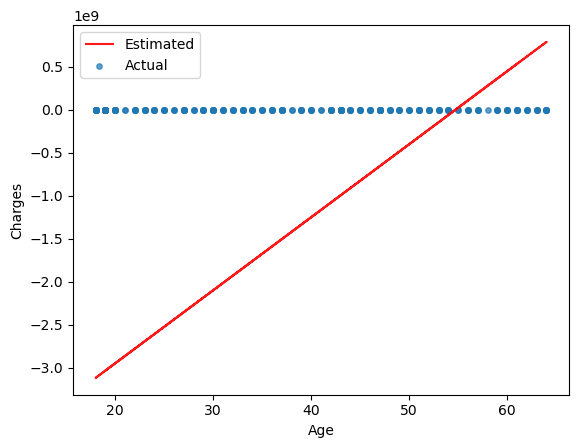

In [62]:
# Prepare the data
D = smoker_df[['age']] # ages as DataFrame
f = smoker_df['charges']  # charges

# Create and train the SGDRegressor model
sgd_model = SGDRegressor()
sgd_model.fit(D, f)

# Make predictions
sgd_predictions = sgd_model.predict(D)

# Compute the loss
try_parameters_smoker(sgd_model.coef_[0], sgd_model.intercept_)

# Complete Model Failure 

It's clear your model has completely diverged and is suffering from a massive scaling issue. The predicted charges are in the billions, while the actual charges are in the thousands. This isn't just a slight inaccuracy; it's a fundamental breakdown of the model's ability to learn.

Looking at the visualization, the red prediction line is nowhere near the actual data points. In fact, it exhibits an extreme slope, swinging from negative billions to positive billions across the age range. This indicates that the model has learned absurdly large weights, causing it to predict values like $3,000,000,000 instead of realistic charges around $30,000.

In essence, your Stochastic Gradient Descent (SGD) algorithm has completely diverged from any meaningful solution. The algorithm has "exploded", becoming utterly useless for predicting charges. This points to a severe problem in the model's training process, likely related to learning rates, feature scaling, or initial weights.

### Machine Learning

Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets. 

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

We'll look at several examples of each of the above in future tutorials. Here's how the relationship between these three components can be visualized:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [63]:
# Inputs and target fro the model
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']
# Create and fit the Linear Regression model
model = LinearRegression().fit(inputs,targets)
# Make predictions using the model
predictions =  model.predict(inputs)
# Display the loss of the model
print("RMSE: ", RMSE(predictions, targets))



RMSE:  4664.319926057651


In [64]:
model.coef_

array([266.74339853,   7.11137873])

In [65]:
# Input and target for the model
input, target = non_smoker_df[['bmi']], non_smoker_df['charges']
# Create and fit the linear regression model
model = LinearRegression().fit(input, target)
# Make predictions using the model
predictions = model.predict(input)
# Display the loss of the model
print('RMSE: ', RMSE(predictions, target))
print('MAE: ', MAE(predictions, target))

RMSE:  5968.9449095066175
MAE:  4441.686060749453


BMI has a very low weight coefficient, indicating a minimal correlation with charges. Therefore, it is not an effective alone as a input variable for training the model.

Children had bigger correlation so let's also add children to see if it gets better

In [66]:
# Inputs and targets for the model
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
# Create and fit the Linear Regression model
model = LinearRegression().fit(inputs, targets)
# Make predictions using the model
predictions = model.predict(inputs)
# Display the loss of the model
print('RMSE: ', RMSE(predictions, targets))
print('MAE: ', MAE(predictions, targets))

RMSE:  4610.57947744852
MAE:  2523.2909862146594


Let's use SGD to train model

In [67]:
# Inputs and targets for the model
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']
# make the model using SGD
model_SGD = SGDRegressor().fit(inputs, targets)
# Make predictions using the model
predictions_SGD = model_SGD.predict(inputs)
# Display the Loss of the model
print('RMSE: ', RMSE(predictions_SGD, targets))
print('MAE: ', MAE(predictions_SGD, targets))

RMSE:  7160151965.969171
MAE:  5948299073.210219


# multiple inputs for smokers

MAE:  30209.647889927004
RMSE:  32263.54819565854


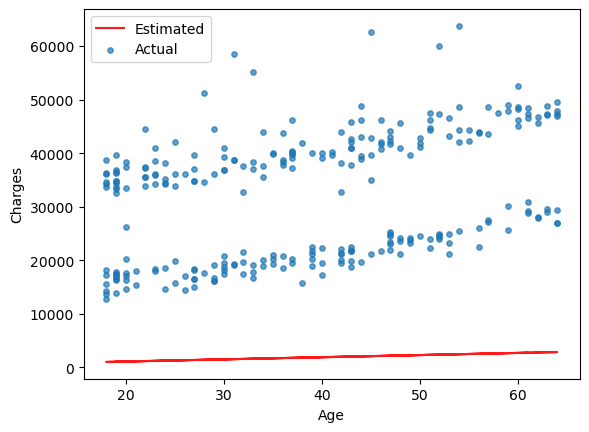

In [68]:
try_parameters_smoker(40, 300)

As we can see there Are two visible group so let's divide to get more accurate rate

We will investigate how to segment smokers into distinct groups. Given that BMI appears to influence smokers charges, we will explore using BMI as a segmentation criterion.

In [91]:
# Group 1: smokers that have BMI > 30
smokers_1= smoker_df[smoker_df['bmi'] > 30]
print('smokers with BMI > 30: ', smokers_high_bmi.charges.corr(smokers_high_bmi['bmi']))

# Group 2: smokers that have BMI <= 30  
smokers_2 = smoker_df[smoker_df['bmi'] <= 30]
print('smokers with BMI <= 30: ', smokers_low_bmi.charges.corr(smokers_low_bmi['bmi']))

# Visualize both groups using subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('BMI > 30', 'BMI ≤ 30')
)

# Add first scatter plot
fig.add_trace(
    go.Scatter(x=smokers_1['bmi'], 
               y=smokers_1['charges'],
               mode='markers',
               name='BMI > 30'),
    row=1, col=1
)

# Add second scatter plot
fig.add_trace(
    go.Scatter(x=smokers_2['bmi'], 
               y=smokers_2['charges'],
               mode='markers',
               name='BMI ≤ 30'),
    row=1, col=2
)

fig.update_layout(title='BMI vs Charges for Smokers by BMI Groups')
fig.show()

smokers with BMI > 30:  0.3650624941873685
smokers with BMI <= 30:  0.30468085018748053


# Smokers_1 charges model

In [92]:
# Inputs and targets for the model
inputs, targets = smokers_1[['age', 'bmi', 'children']], smokers_1['charges']
# Smokers_1 charges model
model_SGD = LinearRegression().fit(inputs, targets)
# Make predictions using the model
predictions_SGD = model_SGD.predict(inputs)
# Display the Loss of the model
print('RMSE: ', RMSE(predictions_SGD, targets))
print('MAE: ', MAE(predictions_SGD, targets))

RMSE:  3619.3767624513384
MAE:  1762.6290153852376


from 40K to 10K the loss RMSE is close to 3600 which is very small error.

# Smokers_2 charges model

In [ ]:
# Inputs and targets for the model
inputs, targets = smokers_2[['age', 'bmi', 'children']], smokers_2['charges']
# Smokers_2 charges model
model_SGD = LinearRegression().fit(inputs, targets)
# Make predictions using the model
predictions_SGD = model_SGD.predict(inputs)
# Display the Loss of the model
print('RMSE: ', RMSE(predictions_SGD, targets))
print('MAE: ', MAE(predictions_SGD, targets))
# Visualize the relationship between age, charges, and bmi for smokers_2 using a 3D scatter plot
fig = px.scatter_3d(
    smokers_2,
    x='age',
    y='charges',
    z = 'bmi',
    title='Age vs Charges for All Customers'
)
fig.update_traces(marker_size=3, marker_opacity=0.7)
fig.show()

RMSE:  3381.537904456078
MAE:  1655.0003964576917


The most accurate model we have seen so far. The loss is 3000 range which is small compare to data set range.

# Train the whole dataset

To evaluate model performance and determine the feasibility of our approach, we will train the model using the complete insurance dataset. This will help us assess whether the loss values are within an acceptable range and identify potential next steps for optimization.

In [72]:
# Inputs and targets for the model
inputs, targets = insurance[['age', 'bmi', 'children']], insurance['charges']
# Create and fit the Linear Regression model
model = LinearRegression().fit(inputs, targets)
# Make predictions using the model
predictions = model.predict(inputs)
# Display the loss of the model
print('RMSE: ', RMSE(predictions, targets))
print('MAE: ', MAE(predictions, targets))

RMSE:  11358.309791063166
MAE:  9019.573149036922


The model performance is inadequate, as the error of 11,000 is unacceptably high. We need to explore alternative training approaches to improve model accuracy.

# Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.

2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.

3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. 
These are called ordinals

![alt text](image-1.png)

 


# Binary Categories
Let's use code_smoker to train model



$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + b$

In [73]:
# Inputs and targets for the model
inputs, targets = insurance[['age', 'bmi', 'children', 'data_smoker']], insurance['charges']
# Create and fit the Linear Regression model
model = LinearRegression().fit(inputs, targets)
# Make predictions using the model
predictions = model.predict(inputs)
# Display the loss of the model
print('RMSE: ', RMSE(predictions, targets))
print('MAE: ', MAE(predictions, targets))

RMSE:  6058.641537157491
MAE:  4181.335298093926


The model performance improved significantly after incorporating the categorical "smoker" column, with the loss decreasing from about 11,000 to 6,000.

We will further enhance the model by incorporating the "sex" categorical feature.


In [74]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,data_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [75]:

sex_data = {'female' : 0, 'male':1}
# We will create a new binary column that represents the categorical "sex" feature using boolean values.
insurance['data_sex'] = insurance['sex'].map(sex_data)
# Display the first few rows of the updated insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges,data_smoker,data_sex
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [76]:
# correlations between charges and gender
insurance.charges.corr(insurance.data_sex)

0.05804449579031289

The correlation between charges and sex is weak.

In [77]:
# Inputs and targets for the model
inputs, targets = insurance[['age', 'bmi', 'children', 'data_smoker', 'data_sex']], insurance['charges']
# Create and fit the Linear Regression model
model = LinearRegression().fit(inputs, targets)
# Make predictions using the model
predictions = model.predict(inputs)
# Display the loss of the model
print('RMSE: ', RMSE(predictions, targets))
print('MAE: ', MAE(predictions, targets))

RMSE:  6058.310641972325
MAE:  4181.319199443617


there is 0.3 difference on the model error so sex did not change a lot


### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Create a OneHotEncode instance
encoder = OneHotEncoder().fit(insurance[['region']])
# Transform the 'region' column into one-hot encoded features
insurance_region_encoded = encoder.transform(insurance[['region']]).toarray()
# Get thelfeature names from the encoder
feature_names = encoder.get_feature_names_out(['region'])
print(" feature names:", feature_names)
# Create a columns with the one-hot encoded features
insurance[feature_names] = insurance_region_encoded
# Display the first few rows of the updates insurance dataset
insurance.head()



Actual feature names: ['region_northeast' 'region_northwest' 'region_southeast'
 'region_southwest']


,age,sex,bmi,children,smoker,region,charges,data_smoker,data_sex,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + w_6 \times northeast + w_7 \times northwest + w_8 \times southeast+ w_9 \times southwest + b$

In [101]:
# input and target for the model
inputs, targets = insurance[['age', 'bmi', 'children', 'data_smoker', 'data_sex', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']], insurance['charges']
# Create and fit the Linear Regression model
model = LinearRegression().fit(inputs, targets)    
# Make predictions using the model
predictions = model.predict(inputs)
# Display the Loss of the model
print('RMSE: ', RMSE(predictions, targets))
print('MAE: ', MAE(predictions, targets))


RMSE:  6043.849901947357
MAE:  4173.489618347103


The model loss decreased slightly from 6,058.31 to 6,043.85 when adding the region feature, indicating a minimal improvement.

## Model Improvements

Let's discuss and apply some more improvements to our model.

### Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model. 

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + w_6 \times northeast + w_7 \times northwest + w_8 \times southeast+ w_9 \times southwest + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights. 